In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('./data/^GSPC_2011.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,1257.619995,1276.170044,1257.619995,1271.869995,1271.869995,4286670000
1,2011-01-04,1272.949951,1274.119995,1262.660034,1270.199951,1270.199951,4796420000
2,2011-01-05,1268.780029,1277.630005,1265.359985,1276.560059,1276.560059,4764920000
3,2011-01-06,1276.290039,1278.170044,1270.430054,1273.849976,1273.849976,4844100000
4,2011-01-07,1274.410034,1276.829956,1261.699951,1271.500000,1271.500000,4963110000
5,2011-01-10,1270.839966,1271.520020,1262.180054,1269.750000,1269.750000,4036450000
6,2011-01-11,1272.579956,1277.250000,1269.619995,1274.479980,1274.479980,4050750000
7,2011-01-12,1275.650024,1286.869995,1275.650024,1285.959961,1285.959961,4226940000
8,2011-01-13,1285.780029,1286.699951,1280.469971,1283.760010,1283.760010,4310840000
9,2011-01-14,1282.900024,1293.239990,1281.239990,1293.239990,1293.239990,4661590000


In [3]:
df.shape

(252, 7)

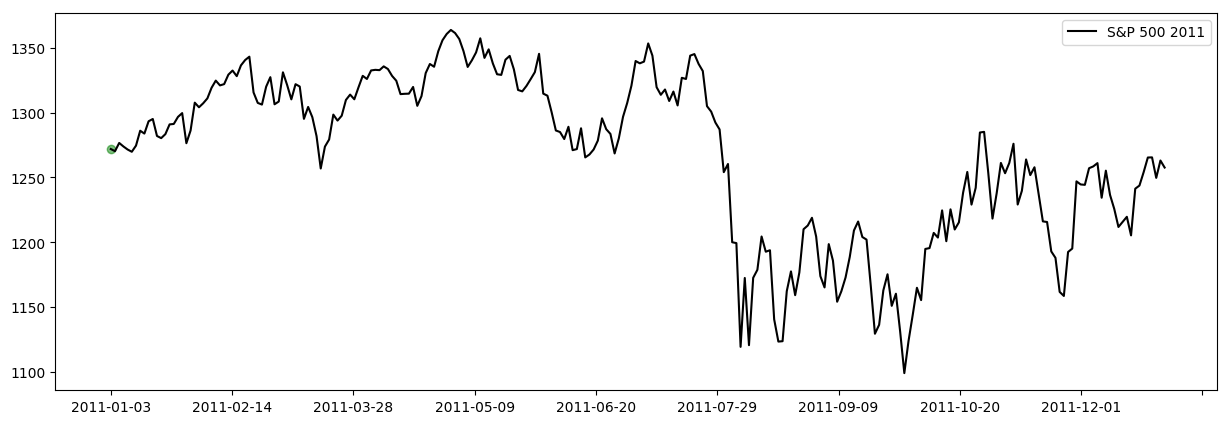

In [5]:
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df['Date'], df['Close'], color='black', label='S&P 500 2011')
plt.xticks(np.linspace(0, 260, 10))
plt.legend()
plt.show()